# Figures on statistical moment orders

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, skewnorm
from statsmodels.sandbox.distributions.extras import pdf_mvsk

from src.tools.file import store_plt

sns.set_style("whitegrid")

### Parameters for all normal distributions.

All plots have the following default settings:
- $\mu_1 = 0$
- $\mu_2 = 1$
- $\mu_3 = 0$
- $\mu_4 = 0$

In [2]:
mu = 0
sigma = 1

ix = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)

### Define pdfs for all distributions.

In [3]:
df_mean = pd.DataFrame({
    "$\mu_1 = 1$": norm.pdf(ix, 1, sigma),
    "$\mu_1 = 0$": norm.pdf(ix, mu, sigma)
}).set_index(ix)

df_var = pd.DataFrame({
    "$\mu_2 = 2$": norm.pdf(ix, mu, 2),
    "$\mu_2 = 1$": norm.pdf(ix, mu, sigma)
}).set_index(ix)

df_skew = pd.DataFrame({
    "$\mu_3 = 10$": skewnorm.pdf(ix, a=10, loc=mu, scale=sigma),
    "$\mu_3 = 0$": skewnorm.pdf(ix, a=0, loc=mu, scale=sigma),
}).set_index(ix)

df_kurt = pd.DataFrame({
    "$\mu_4 = 1$": pdf_mvsk([0, 1, 0, 1])(ix),
    "$\mu_4 = 0$": skewnorm.pdf(ix, a=0, loc=mu, scale=sigma),
}).set_index(ix)

### Create plots

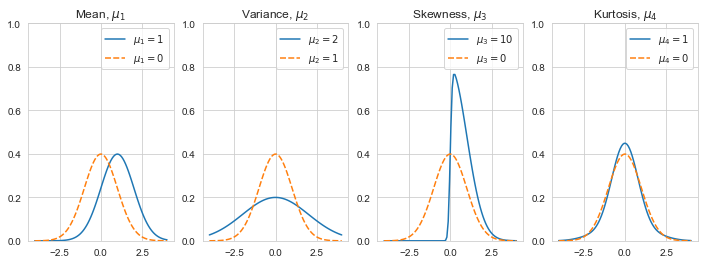

In [4]:
fig, axs = plt.subplots(ncols=4, figsize=(12, 4))

y_lim = (0,1)

sns.lineplot(data=df_mean, ax=axs[0]).set(title="Mean, $\mu_1$", ylim=y_lim)
sns.lineplot(data=df_var, ax=axs[1]).set(title="Variance, $\mu_2$", ylim=y_lim)
sns.lineplot(data=df_skew, ax=axs[2]).set(title="Skewness, $\mu_3$", ylim=y_lim)
sns.lineplot(data=df_kurt, ax=axs[3]).set(title="Kurtosis, $\mu_4$", ylim=y_lim) and None

store_plt('mvsk')